<a href="https://colab.research.google.com/github/Avelez164/Machine-Learning/blob/main/CPSC483Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Import dataset from Kaggle#

In [16]:
import kagglehub

# Define the dataset identifier
dataset = "samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025"

# Download the latest version of the dataset
path = kagglehub.dataset_download(dataset)

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-global-ai-ml-data-science-salary-for-2025


In [18]:
!ls /kaggle/input/the-global-ai-ml-data-science-salary-for-2025


salaries.csv


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



In [22]:
import pandas as pd

df = pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')

display(df)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [31]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [32]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 40)


Unique values in 'work_year':
[2025 2024 2022 2023 2020 2021]
----------------------------------------
Unique values in 'experience_level':
['MI' 'SE' 'EN' 'EX']
----------------------------------------
Unique values in 'employment_type':
['FT' 'CT' 'PT' 'FL']
----------------------------------------
Unique values in 'job_title':
['Customer Success Manager' 'Engineer' 'Applied Scientist' 'Data Analyst'
 'Software Development Engineer' 'Research Scientist' 'Data Scientist'
 'Platform Engineer' 'Computational Biologist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Cloud Engineer' 'Data Management Specialist'
 'Data Product Owner' 'Software Engineer' 'Machine Learning Engineer'
 'Associate' 'Data Engineer' 'Product Manager' 'Data Operations Engineer'
 'Business Intelligence Engineer' 'Research Engineer' 'Analytics Engineer'
 'Analyst' 'Actuarial Analyst' 'Manager' 'Architect' 'Software Developer'
 'Member of Technical Staff' 'BI Analyst' 'AI Engineer'
 'Data Governance Analyst' 'Developer

In [35]:
df_cleaned1 = df.copy()


In [36]:
experience_level = {
    "EN": "Junior",
    "MI": "Intermediate",
    "SE": "Senior Expert",
    "EX": "Executive Director"
}
employment_type = {
    "PT": "Part-Time",
    "FT": "Full-Time",
    "CT": "Contract-Based",
    "FL": "Freelance"
}
remote_work_ratio = {
    0: "On-Site (No Remote Work)",
    50: "Hybrid (50% Remote)",
    100: "Fully Remote"
}
company_sizes = {
    "S": "Small Business",
    "M": "Mid-Sized Company",
    "L": "Large Enterprise"
}
df_cleaned1["experience_level"] = df_cleaned1["experience_level"].map(experience_level)
df_cleaned1["employment_type"] = df_cleaned1["employment_type"].map(employment_type)
df_cleaned1["remote_ratio"] = df_cleaned1["remote_ratio"].map(remote_work_ratio)
df_cleaned1["company_size"] = df_cleaned1["company_size"].map(company_sizes)


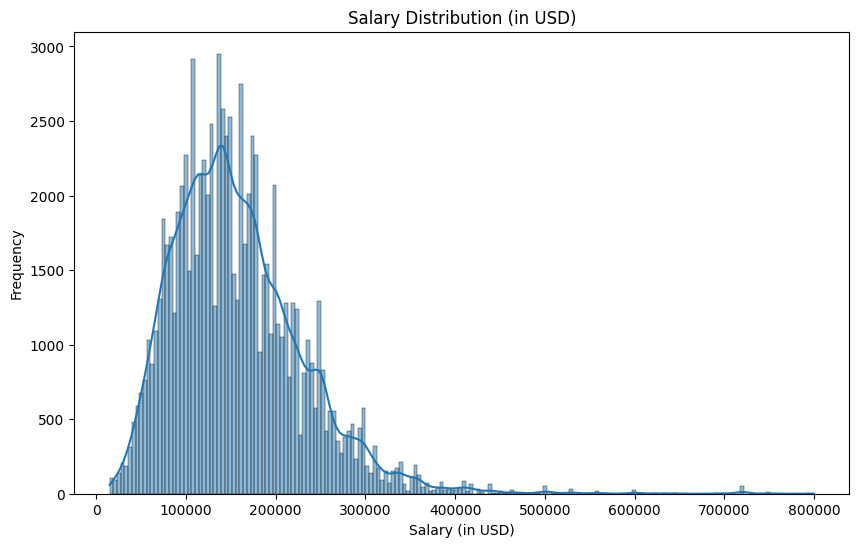

In [41]:
#salary Dist (Hist)
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned1['salary_in_usd'], kde=True)
plt.title('Salary Distribution (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.show()


Here is a preview of the data:
   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL   

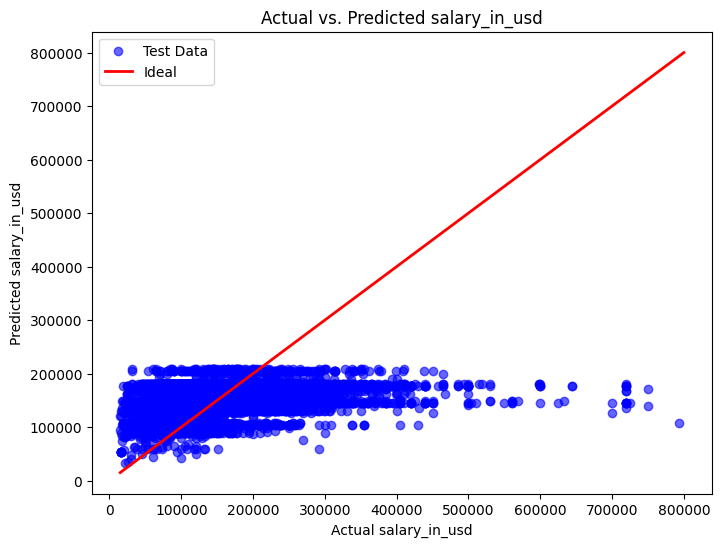

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/kaggle/input/the-global-ai-ml-data-science-salary-for-2025/salaries.csv')

print("Here is a preview of the data:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)

# dummy variables for some of our categorical features.
# encode 'experience_level' and 'employment_type' so we can use them in our regression.
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type'], drop_first=True)

# set of predictors that we'll use for our model.
# 'remote_ratio' and 'work_year' since they're numeric.
# add our encoded categorical columns from 'experience_level' and 'employment_type'.
predictors = ['remote_ratio', 'work_year']
# Get all dummy columns that were created for experience_level (e.g., experience_level_SE)
dummy_exp_cols = [col for col in df_encoded.columns if col.startswith('experience_level_')]
# Get all dummy columns that were created for employment_type (e.g., employment_type_PT)
dummy_emp_cols = [col for col in df_encoded.columns if col.startswith('employment_type_')]
# Combine them all into our predictor list
predictors.extend(dummy_exp_cols)
predictors.extend(dummy_emp_cols)

# The target variable we want to predict will be salary_in_usd.
target = 'salary_in_usd'

# Define a function to run our regression and plot the results
def regression_analysis(data, predictors, target, test_size=0.2, random_state=42):
    # Remove rows that are missing any of the chosen predictor or target values.
    clean_data = data.dropna(subset=predictors + [target])

    # Separate our data into features (X) and the target (y).
    X = clean_data[predictors]
    y = clean_data[target]

    # Split the data into a training set and a testing set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create a linear regression model and fit it on the training data.
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Use the model to make predictions on both the training and testing data.
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate our error metrics.
    rss_train = np.sum((y_train - train_pred) ** 2)
    rss_test = np.sum((y_test - test_pred) ** 2)
    mse_test = mean_squared_error(y_test, test_pred)

    print("\nTraining RSS: {:.2f}".format(rss_train))
    print("Testing RSS: {:.2f}".format(rss_test))
    print("Testing MSE: {:.2f}".format(mse_test))

    # Plot actual vs. predicted values on the test set.
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, test_pred, color='blue', alpha=0.6, label='Test Data')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal')
    plt.xlabel('Actual ' + target)
    plt.ylabel('Predicted ' + target)
    plt.title('Actual vs. Predicted ' + target)
    plt.legend()
    plt.show()

    return model

# Now we run our regression analysis using our encoded data
model = regression_analysis(df_encoded, predictors, target, test_size=0.2)
